In [1]:
from gwpy.timeseries import TimeSeries
from gwpy.time import tconvert
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
from gwpy.segments import Segment
from gwpy.segments import SegmentList
from gwpy.segments import DataQualityDict
from gwpy.segments import DataQualityFlag
import datetime
from gwpy.time import tconvert
from gwpy.time import from_gps
from gwpy.time import to_gps
import pandas as pd

In [2]:
# Find gps times in filenames
filelist = os.listdir('/home/gabriela.gonzalez/EarthquakeInvestigation/Feb2020SecTrendDataFiles')
gpslist = []
for file in filelist:
    if file[0:2]=='CS':
        gps = file[10:20]
        gpslist.append(gps)
        
print(gpslist)

['1264550418', '1264636818', '1264723218', '1264809618', '1264896018', '1264982418', '1265068818', '1265155218', '1265241618', '1265328018', '1265414418', '1265500818', '1265587218', '1265673618', '1265760018', '1265846418', '1265932818', '1266019218', '1266105618', '1266192018', '1266278418', '1266364818', '1266451218', '1266537618', '1266624018', '1266710418', '1266796818', '1266883218', '1266969618']


In [3]:
daydata = []
brokelock = None

In [13]:
for gps in gpslist:
    
    print(gps)
    fname = '/home/gabriela.gonzalez/EarthquakeInvestigation/Feb2020SecTrendDataFiles/CSZEQPEAK_' + gps + '.hdf'
    data = TimeSeries.read(fname)
    gpss = int(gps)
    gpse = gpss+24*3600
    seglist = DataQualityFlag.query('L1:DMT-GRD_ISC_LOCK_NOMINAL:1',gpss, gpse).active
    
    t0 = data.t0.value
    t = data.times.value - t0 #time since initial day time
    z = data.value

    for i in range(len(seglist)):
        ixs = np.int(np.floor((np.float(seglist[i].start) - np.float(to_gps(data.t0)))))
        ixe = np.int(np.ceil((np.float(seglist[i].end) - np.float(to_gps(data.t0)))))
        ts = np.int(seglist[i].start)
        te = np.int(seglist[i].end)
        maxv = np.max(data.value[ixs:ixe-1])
        imaxv = np.where(data.value == maxv)
        tmaxv = np.int(data.times.value[imaxv])
        medv = np.median(data.value[ixs:ixe-1])
        lastv = data.value[ixe-1]
        date = from_gps(gpss)
        
        brlock = "No"
        if (tmaxv >= (te - 4*60)) & (maxv/medv > 2.5):
            brlock = "Yes"
        
        daydata.append([date, ts, te, tmaxv, maxv, medv, lastv, brlock])

1267056018


FileNotFoundError: [Errno 2] No such file or directory: '/home/gabriela.gonzalez/EarthquakeInvestigation/Feb2020SecTrendDataFiles/CSZEQPEAK_1267056018.hdf'

In [5]:
# Find gps times in filenames
filelist = os.listdir('/home/gabriela.gonzalez/EarthquakeInvestigation/Mar2020SecTrendDataFiles')
gpslist = []
for file in filelist:
    if file[0:2]=='CS':
        gps = file[10:20]
        gpslist.append(gps)
        
print(gpslist)

['1267056018', '1267142418', '1267228818', '1267315218', '1267401618', '1267488018', '1267574418', '1267660818', '1267747218', '1267833618', '1268524818', '1268611218', '1268697618', '1268784018', '1268870418', '1268956818', '1269129618', '1269216018', '1269302418', '1269388818', '1269475218', '1269561618', '1269648018', '1269734418', '1269820818', '1269907218', '1269993618']


In [6]:
for gps in gpslist:
    
    print(gps)
    fname = '/home/gabriela.gonzalez/EarthquakeInvestigation/Mar2020SecTrendDataFiles/CSZEQPEAK_' + gps + '.hdf'
    data = TimeSeries.read(fname)
    gpss = int(gps)
    gpse = gpss+24*3600
    seglist = DataQualityFlag.query('L1:DMT-GRD_ISC_LOCK_NOMINAL:1',gpss, gpse).active
    
    t0 = data.t0.value
    t = data.times.value - t0 #time since initial day time
    z = data.value

    for i in range(len(seglist)):
        ixs = np.int(np.floor((np.float(seglist[i].start) - np.float(to_gps(data.t0)))))
        ixe = np.int(np.ceil((np.float(seglist[i].end) - np.float(to_gps(data.t0)))))
        ts = np.int(seglist[i].start)
        te = np.int(seglist[i].end)
        maxv = np.max(data.value[ixs:ixe-1])
        imaxv = np.where(data.value == maxv)
        tmaxv = np.int(data.times.value[imaxv])
        medv = np.median(data.value[ixs:ixe-1])
        lastv = data.value[ixe-1]
        date = from_gps(gpss)
        
        brlock = "No"
        if (tmaxv >= (te - 4*60)) & (maxv/medv > 2.5):
            brlock = "Yes"  
        
        daydata.append([date, ts, te, tmaxv, maxv, medv, lastv, brlock])

1267056018
1267142418
1267228818
1267315218
1267401618
1267488018
1267574418
1267660818
1267747218
1267833618
1268524818
1268611218
1268697618
1268784018
1268870418
1268956818
1269129618
1269216018
1269302418
1269388818
1269475218
1269561618
1269648018
1269734418
1269820818
1269907218
1269993618


In [7]:
df5m = pd.DataFrame(daydata, columns = ['Date', 'Segment Start Time', 'Segment End Time', 'Time of Max Velocity', 'Max Velocity', 'Median Velocity', 'Last Velocity', 'Broke Lock'])
df5m

,Date,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
0,2020-02-01,1264550418,1264575698,1264555589,311.368683,133.568344,178.408234,No
1,2020-02-01,1264578599,1264610473,1264580695,364.818329,143.934982,181.601654,No
2,2020-02-01,1264612075,1264636818,1264618645,359.448883,171.038452,121.923210,No
3,2020-02-02,1264636818,1264723218,1264650919,2997.984863,112.391945,103.713081,No
4,2020-02-03,1264723218,1264769389,1264752814,282.059692,111.927658,114.665329,No
5,2020-02-03,1264778559,1264780665,1264778721,264.498322,149.424530,112.947060,No
6,2020-02-03,1264782897,1264809618,1264800700,441.627472,162.101944,135.846191,No
7,2020-02-04,1264809618,1264822064,1264819563,403.763947,155.877380,146.120575,No
8,2020-02-04,1264822366,1264864035,1264863863,563.525513,180.828720,360.682312,Yes
9,2020-02-04,1264884301,1264896018,1264887808,462.173645,199.352432,162.249802,No


In [8]:
df5m.to_csv("FebMar_daydata_300s.csv")

In [9]:
dfeq5m = df5m[df5m['Broke Lock'] == 'Yes']
dfeq5m

,Date,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
8,2020-02-04,1264822366,1264864035,1264863863,563.525513,180.828720,360.682312,Yes
11,2020-02-05,1264927676,1264962696,1264962694,7329.563965,165.590530,7323.872559,Yes
14,2020-02-06,1264982418,1265025132,1265024892,944.338013,272.152039,456.143860,Yes
35,2020-02-13,1265616620,1265626078,1265625997,4424.996094,210.064087,2257.297607,Yes
46,2020-02-20,1266195649,1266263244,1266263240,1687.458740,141.905273,1640.945679,Yes
81,2020-03-09,1267747218,1267758959,1267758887,1928.361328,203.682800,2056.489502,Yes
88,2020-03-18,1268524818,1268572799,1268572766,3146.900146,91.509995,2072.461182,Yes
99,2020-03-25,1269129618,1269140510,1269140508,12463.922852,145.411972,14226.318359,Yes


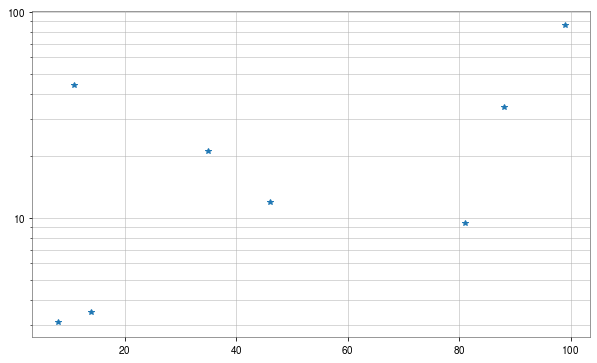

In [12]:
plt.figure(figsize=(10,6))
plt.plot(dfeq5m['Max Velocity']/dfeq5m['Median Velocity'], "*")
plt.yscale("log")
plt.grid(True, which="both", ls="-")

plt.show()

In [15]:
df4m = pd.read_csv('FebMar_daydata_240s.csv')

In [16]:
df5m = pd.read_csv('FebMar_daydata_300s.csv')

In [23]:
dfeq4m = df4m[df4m['Broke Lock'] == 'Yes']
dfeq4m

,Unnamed: 0,Date,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
8,8,2020-02-04,1264822366,1264864035,1264863863,563.525513,180.828720,360.682312,Yes
11,11,2020-02-05,1264927676,1264962696,1264962694,7329.563965,165.590530,7323.872559,Yes
14,14,2020-02-06,1264982418,1265025132,1265024892,944.338013,272.152039,456.143860,Yes
35,35,2020-02-13,1265616620,1265626078,1265625997,4424.996094,210.064087,2257.297607,Yes
46,46,2020-02-20,1266195649,1266263244,1266263240,1687.458740,141.905273,1640.945679,Yes
76,76,2020-02-04,1264822366,1264864035,1264863863,563.525513,180.828720,360.682312,Yes
79,79,2020-02-05,1264927676,1264962696,1264962694,7329.563965,165.590530,7323.872559,Yes
82,82,2020-02-06,1264982418,1265025132,1265024892,944.338013,272.152039,456.143860,Yes
103,103,2020-02-13,1265616620,1265626078,1265625997,4424.996094,210.064087,2257.297607,Yes
114,114,2020-02-20,1266195649,1266263244,1266263240,1687.458740,141.905273,1640.945679,Yes


In [25]:
dfneq4m = df4m[df4m['Broke Lock'] == 'No']
dfneq4m

,Unnamed: 0,Date,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
0,0,2020-02-01,1264550418,1264575698,1264555589,311.368683,133.568344,178.408234,No
1,1,2020-02-01,1264578599,1264610473,1264580695,364.818329,143.934982,181.601654,No
2,2,2020-02-01,1264612075,1264636818,1264618645,359.448883,171.038452,121.923210,No
3,3,2020-02-02,1264636818,1264723218,1264650919,2997.984863,112.391945,103.713081,No
4,4,2020-02-03,1264723218,1264769389,1264752814,282.059692,111.927658,114.665329,No
5,5,2020-02-03,1264778559,1264780665,1264778721,264.498322,149.424530,112.947060,No
6,6,2020-02-03,1264782897,1264809618,1264800700,441.627472,162.101944,135.846191,No
7,7,2020-02-04,1264809618,1264822064,1264819563,403.763947,155.877380,146.120575,No
9,9,2020-02-04,1264884301,1264896018,1264887808,462.173645,199.352432,162.249802,No
10,10,2020-02-05,1264896018,1264924641,1264899398,398.887604,172.471909,121.414207,No


In [35]:
dfneq5m = df5m[df5m['Broke Lock'] == 'No']
dfneq5m

,Unnamed: 0,Date,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
0,0,2020-02-01,1264550418,1264575698,1264555589,311.368683,133.568344,178.408234,No
1,1,2020-02-01,1264578599,1264610473,1264580695,364.818329,143.934982,181.601654,No
2,2,2020-02-01,1264612075,1264636818,1264618645,359.448883,171.038452,121.923210,No
3,3,2020-02-02,1264636818,1264723218,1264650919,2997.984863,112.391945,103.713081,No
4,4,2020-02-03,1264723218,1264769389,1264752814,282.059692,111.927658,114.665329,No
5,5,2020-02-03,1264778559,1264780665,1264778721,264.498322,149.424530,112.947060,No
6,6,2020-02-03,1264782897,1264809618,1264800700,441.627472,162.101944,135.846191,No
7,7,2020-02-04,1264809618,1264822064,1264819563,403.763947,155.877380,146.120575,No
9,9,2020-02-04,1264884301,1264896018,1264887808,462.173645,199.352432,162.249802,No
10,10,2020-02-05,1264896018,1264924641,1264899398,398.887604,172.471909,121.414207,No


(array([6., 1., 1., 2., 0., 2., 0., 0., 0., 1.]),
 array([  563.5255127 ,  1753.56524658,  2943.60498047,
         4133.64471436,  5323.68444824,  6513.72418213,
         7703.76391602,  8893.8036499 , 10083.84338379,
        11273.88311768, 12463.92285156]),
 <BarContainer object of 10 artists>)

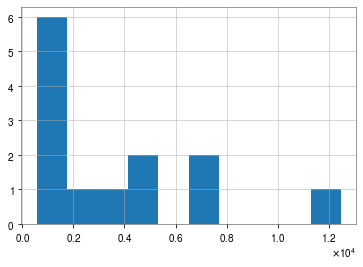

In [26]:
plt.hist(dfeq4m['Max Velocity'])


(array([85., 40., 16.,  5.,  5.,  2.,  2.,  0.,  1.,  3.]),
 array([ 174.25419617,  477.01888885,  779.78358154,
        1082.54827423, 1385.31296692, 1688.07765961,
        1990.84235229, 2293.60704498, 2596.37173767,
        2899.13643036, 3201.90112305]),
 <BarContainer object of 10 artists>)

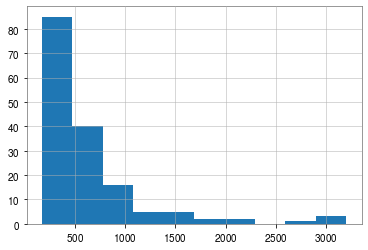

In [27]:
plt.hist(dfneq4m['Max Velocity'])

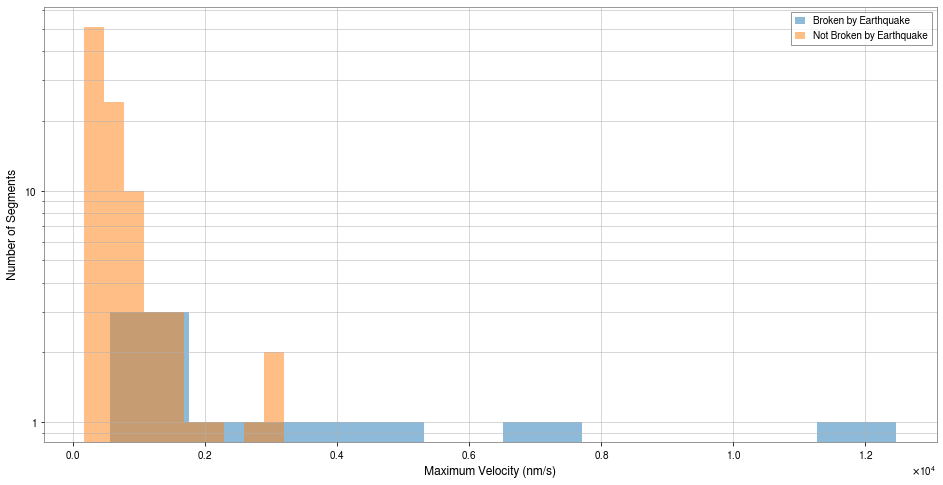

In [41]:
plt.figure(figsize=(16,8))

plt.hist(dfeq5m['Max Velocity'], alpha=0.5, label = 'Broken by Earthquake')
plt.hist(dfneq5m['Max Velocity'], alpha=0.5, label = 'Not Broken by Earthquake')
plt.grid(True, which="both", ls="-")
plt.yscale('log')
plt.xlabel('Maximum Velocity (nm/s)')
plt.ylabel('Number of Segments')
plt.legend()

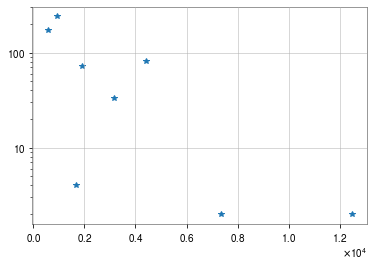

In [37]:
plt.plot(dfeq5m['Max Velocity'], dfeq5m['Segment End Time']-dfeq5m['Time of Max Velocity'], '*')
plt.yscale('log')

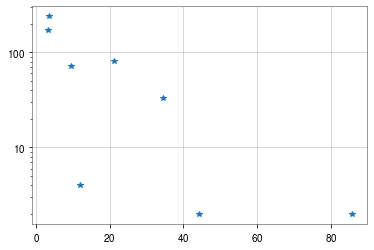

In [38]:
plt.plot(dfeq5m['Max Velocity']/dfeq5m['Median Velocity'], dfeq5m['Segment End Time']-dfeq5m['Time of Max Velocity'], '*')
plt.yscale('log')

In [18]:
dfeq5m = df5m[df5m['Broke Lock'] == 'Yes']
dfeq5m

,Unnamed: 0,Date,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
8,8,2020-02-04,1264822366,1264864035,1264863863,563.525513,180.828720,360.682312,Yes
11,11,2020-02-05,1264927676,1264962696,1264962694,7329.563965,165.590530,7323.872559,Yes
14,14,2020-02-06,1264982418,1265025132,1265024892,944.338013,272.152039,456.143860,Yes
35,35,2020-02-13,1265616620,1265626078,1265625997,4424.996094,210.064087,2257.297607,Yes
46,46,2020-02-20,1266195649,1266263244,1266263240,1687.458740,141.905273,1640.945679,Yes
81,81,2020-03-09,1267747218,1267758959,1267758887,1928.361328,203.682800,2056.489502,Yes
88,88,2020-03-18,1268524818,1268572799,1268572766,3146.900146,91.509995,2072.461182,Yes
99,99,2020-03-25,1269129618,1269140510,1269140508,12463.922852,145.411972,14226.318359,Yes


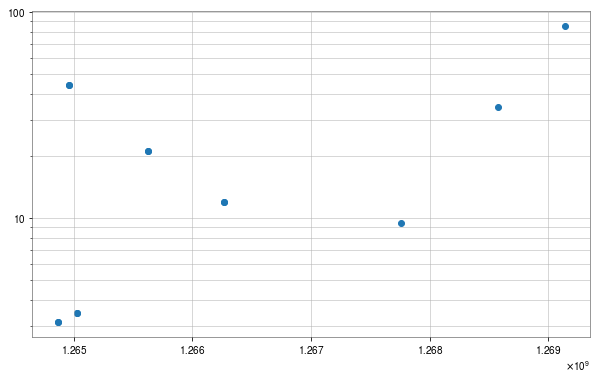

In [24]:
plt.figure(figsize=(10,6))
plt.plot(dfeq4m['Segment End Time'], dfeq4m['Max Velocity']/dfeq4m['Median Velocity'], "o")
plt.yscale("log")
plt.grid(True, which="both", ls="-")

plt.show()